In [1]:
import sys

is_main = __name__ == "__main__"

lin_sys_path = '..\\linear_systems\\'
function_path ='..\\zeros_of_functions\\'

sys.path.append(lin_sys_path)
sys.path.append(function_path)

from Vectors import Vector
from Matrix import Matrix
from Linear_systems import Linear_System
from Functions import Func

import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_curve (func: 'Func', axe: 'plt.Axes', interval_x: list, interval_y: list,
                step: float = 0.1, color_val: str = 'b', label_txt: str = '') -> None:    
    """
    Function to plot a given expression curve in a certain interval
    """    
    
    # Create the values of X in the interval
    x_np = np.arange(*interval_x, step)

    # Limit the graph to improve visualization of the curve
    
    axe.set(xlim= interval_x, ylim = interval_y)

    # Plots it
    axe.plot(x_np, func(x_np), color=color_val, label=label_txt)
    axe.legend()

def plot_cartesian_lines (axe, interval_x: list, interval_y: list):
    # plots the x and y lines in black in the axe.
    if not interval_y[1]:
        interval_y = [-10, 10]

    if not interval_x[1]:
        interval_x = [-10, 10]
        
    x_np = np.arange(*interval_x, 0.1)
    y_np = np.arange(*interval_y, 0.1)

    axe.plot(x_np, [0 for  _ in x_np], c='black', label='x')
    axe.plot([0 for _ in y_np], y_np, c='black', label='y')

def plot_func_in_cartesian (func: 'Func', axe: 'plt.Axes', interval_x: list):
    """
    Function used to plot the graph of any function in the cartesian plan.
    in a given x interval
    """

    inter_x, inter_y = intervals(
        interval_x,
        [func.global_max_min('min'), func.global_max_min('max')]
    )

    # Plots the abcisse and ordinate lines
    plot_cartesian_lines(axe, inter_x, inter_y)

    # Plots the function curve
    plot_curve(func, axe, inter_x, inter_y, label_txt='f(x)')
    

def plot_points (x_coordinates: list, y_coordinates: list, axe: 'plt.Axes',
                 marker:str = '.', color_val: str='black', label_txt: str = '', size: int=50):
    """
    Functions to plot a given array of points.
    """
    
    axe.scatter (x_coordinates, y_coordinates, marker=marker,
                 color = color_val, label = label_txt, s = size)
    
def intervals (x_coordinates: list, y_coordinates: list) -> list:
    """
    Function that calculates the best interval to make sure all the
    points will be shown with a good visualization.
    """


    max_x, max_y = max(x_coordinates), max(y_coordinates)

    min_x, min_y = min(x_coordinates), min(y_coordinates)

    # By tests, I found out that 0.75 of the whole interval is the best increment
    # to improve the visualization of the data.
    increment_x = ((max_x - min_x)/len(x_coordinates)) * 0.75
    increment_y = ((max_y - min_y)/len(y_coordinates)) * 0.75

    x_interval = [min_x - increment_x, max_x + increment_x]
    y_interval = [min_y - increment_y, max_y + increment_y]

    return [x_interval, y_interval]

8x3
3x8
3x8
3x3
3x8
3x3
3x3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.01548*x**2 + 0.07738*x + 0 + 0.40714


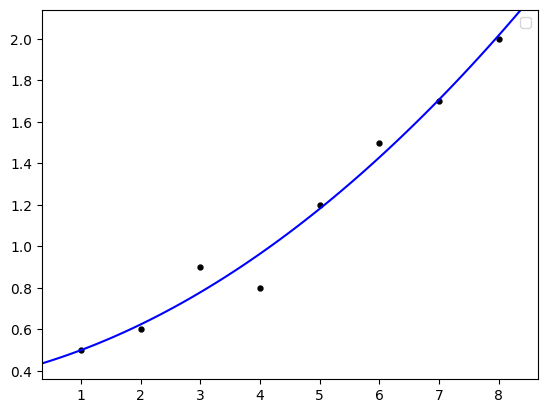

In [3]:
from Linear_adjusts import Linear_adjust, build_guess_expression
import sympy as sym
import math

points_1 = [
        (0, -153),
        (0.25, 64),
        (0.5, 242),
        (0.75, 284),
        (1, 175),
    ]

points_2 = [
    (1, 0.5),
    (2, 0.6),
    (3, 0.9),
    (4, 0.8),
    (5, 1.2),
    (6, 1.5),
    (7, 1.7),
    (8, 2.0)
]
       

x = sym.symbols('x')

x_coords = [point[0] for point in points_2]
y_coords = [point[1] for point in points_2]

# Lembre-se -> Se a função parecer deslocada, adicione o deslocamento ao resultado
guess_1 = [x, 1]
guess_2 = [x**2, x, 1]

lin_ad = Linear_adjust(points_2, guess_2)

func = lin_ad.build_linear_fit_function()

print(func)

fig, axe = plt.subplots()

interval_x, interval_y = intervals(x_coords, y_coords)

plot_curve(func, axe, interval_x, interval_y)

plot_points(x_coords, y_coords, axe)